### ----------------- Keras Hyperparameter Tunning -------------------

In [1]:
import numpy as np
import pandas as pd

In [2]:
df =pd.read_csv("/kaggle/input/diabetes/diabetes.csv")

In [175]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [176]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

```python
As we can see all the columns have some dependency on the
Outcome column so we can neglect any columns from the the dataframe
````

# Explanation

## `df.corr()`

- The `corr()` function in Pandas is used to compute the correlation matrix for the DataFrame `df`.
- A correlation matrix is a table that shows the correlation coefficients between variables.
- The correlation coefficient ranges between -1 and +1:
  - **+1** indicates a perfect positive correlation.
  - **-1** indicates a perfect negative correlation.
  - **0** indicates no correlation.

## `['Outcome']`

- By adding `['Outcome']`, you are selecting only the correlations of all columns with the `'Outcome'` column.
- This results in a Series where the index is the column names of the DataFrame and the values are the correlation coefficients with the `'Outcome'` column.

# Use Case

This method is often used to identify how strongly each feature (column) is related to a particular target variable (in this case, `'Outcome'`). For example, in a diabetes dataset, `'Outcome'` might be a binary variable representing the presence or absence of diabetes, and `df.corr()['Outcome']` will help you find which features (like `Glucose`, `BMI`, `Age`) are most strongly correlated with having diabetes.


### Dependent & Independent Features

In [177]:
X= df.iloc[:,:-1]
y = df.iloc[:,-1]

### Scaling the input 

In [178]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [179]:
X= scale.fit_transform(X)

In [180]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=1)

In [181]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [182]:
# Initialize the Sequential model
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and input dimension of 8
model.add(Dense(32, activation='relu', input_dim=8))

# Add an output Dense layer with 1 unit and sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary crossentropy loss
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Explanation of the `verbose` Parameter in Keras

The `verbose` parameter in Keras (used in functions like `fit`, `evaluate`, and `predict`) controls how much information the model displays during training or evaluation. It is a way to adjust the amount of logging or progress details that are shown in the console.

## Verbose Parameter Options:

### 1. **`verbose=0`**
- **No Output**: Suppresses all output during the training or evaluation process. No information about epochs or metrics is shown in the console.
- **Use Case**: Useful when you want to minimize the amount of console output, such as when running multiple experiments or training the model in the background.

### 2. **`verbose=1`**
- **Progress Bar**: Displays a dynamic progress bar with information about epochs, iterations, loss, accuracy, and other metrics.
- **Use Case**: Useful for a visual overview of training progress and metrics in real-time.

### 3. **`verbose=2`**
- **One Line Per Epoch**: Prints a single line per epoch, showing the epoch number, loss, accuracy, and any other metrics. It does not display a dynamic progress bar but logs each epoch's performance.
- **Use Case**: Useful when you want a summary of each epoch without the clutter of a progress bar.

---
Choosing the appropriate `verbose` value depends on your specific requirements. If you need detailed information during training, `verbose=1` is often the best option. If you prefer a more concise output or plan to run the code in the background, `verbose=0` or `verbose=2` would be more appropriate.


In [183]:
# Train the model on the training data (X_train, y_train) for 10 epochs with a batch size of 32
model.fit(X_train, y_train, batch_size=32, epochs=10,validation_data=(X_test,y_test),verbose = 0)

### Accuracy of model

In [184]:
loss,accuracy = model.evaluate(X_test,y_test)
print("Accuracy of model is :- ",accuracy*100)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7981 - loss: 0.4614 
Accuracy of model is :-  79.65368032455444


### Now Increase the no of epochs to 100

In [185]:
# Train the model on the training data (X_train, y_train) for 10 epochs with a batch size of 32
history  = model.fit(X_train, y_train, batch_size=32, epochs=100,validation_data=(X_test,y_test),verbose =0 )

### Accuracy of model

In [186]:
loss,accuracy = model.evaluate(X_test,y_test)
print("Accuracy of Model",accuracy*100)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8329 - loss: 0.4250 
Accuracy of Model 81.81818127632141


### Optimizers in keras 
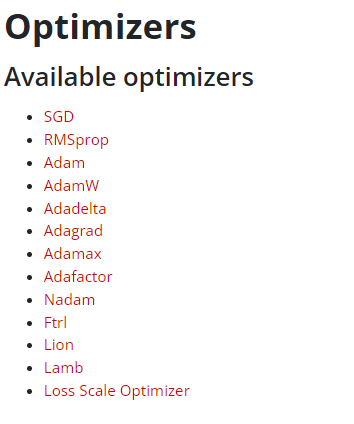

#### 1. how to select appropriate optimized 
#### 2. No, of nodes in a layer 
#### 3. how to select no. of layers 
#### 4. All in all one model
```python
for doing all these stuffs we need to install 
Keras tunner library 
```

# 1.How to select appropriate optimized for our Model

In [77]:
import kerastuner as kt

In [78]:
def build_model(hp):
    # Initialize the Sequential model
    model = Sequential()
    
    # Add a fully connected layer with 32 neurons and ReLU activation function
    model.add(Dense(32, activation="relu", input_dim=8))

    # Add an output layer with 1 neuron and sigmoid activation function for binary classification
    model.add(Dense(1, activation="sigmoid"))

    # Choose the optimizer using Hyperparameters (hp)
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta', 'adagrad', 'adamax', 
                    'adafactor', 'nadam', 'ftrl', 'sgd_with_momentum', 
                    'amsgrad', 'proximal_sgd', 'proximal_adagrad'])
    
    # Compile the model with the chosen optimizer, binary crossentropy loss, and accuracy metric
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Return the compiled model
    return model


In [79]:
tuner = kt.RandomSearch(
    build_model,                 # The function to build the model
    objective='val_accuracy',    # The metric to optimize during the search
    max_trials=5                 # The maximum number of different models to try
)


Reloading Tuner from ./untitled_project/tuner0.json


# Explanation of the Code

## Tuner Initialization
- `tuner = kt.RandomSearch(...)`: This line initializes a hyperparameter tuner using the Random Search strategy from the Keras Tuner library (kt). This strategy randomly samples from the hyperparameter space to find the best configuration for the model.

## Model Building Function
- `build_model`: This is the function defined earlier that constructs and compiles the model. The tuner will call this function multiple times with different hyperparameter settings.

## Objective
- `objective='val_accuracy'`: This specifies the metric that the tuner will optimize. In this case, it aims to maximize the validation accuracy (`val_accuracy`), which is essential for evaluating the model's performance on unseen data.

## Max Trials
- `max_trials=5`: This sets the maximum number of different models (or trials) the tuner will evaluate. In this case, it will try up to 5 different configurations of the model based on various hyperparameters.

# Summary
The `RandomSearch` tuner is an effective way to search through the hyperparameter space of a model. It randomly samples combinations of hyperparameters defined in the `build_model` function and evaluates the model based on the specified objective. This process helps in finding an optimal model configuration that maximizes validation accuracy.


In [80]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)


In [81]:
tuner.results_summary()


Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
optimizer: adam
Score: 0.7748917937278748

Trial 3 summary
Hyperparameters:
optimizer: rmsprop
Score: 0.7748917937278748

Trial 0 summary
Hyperparameters:
optimizer: sgd
Score: 0.6277056336402893

Trial 2 summary
Hyperparameters:
optimizer: adadelta
Score: 0.5800865888595581


In [82]:
model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7825 - loss: 0.4342 


[0.4348549544811249, 0.7878788113594055]

In [83]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")


Best Hyperparameters: {'optimizer': 'adam'}


In [84]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model = tuner.get_best_models(num_models=1)[0]

In [86]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.fit(X_train,y_train,batch_size=32, epochs=100, initial_epoch=6, validation_data=(X_test,y_test),verbose =0)

In [88]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print(f'Test Accuracy: {accuracy*100:.4f}')


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.4341 
Test Accuracy: 80.0866



### Now doing this accuracy is increase to 80%
